In [1]:
from utils_torsion_dataset_generator import *

RDKit WARNING: [21:05:47] Enabling RDKit 2019.09.3 jupyter extensions
Failed to import the evaluator package.


#### `OpenFF Gen 2 Torsion Set 2 Coverage` 
- input dataset: Coverage Set

In [2]:
%%capture cap --no-stderr

# Read pickle file containing data downloaded from qcarchive 
with open('coverage_torsiondrive_data.pickle', 'rb') as pfile:
    torsiondrive_data = pickle.load(pfile)

# Create force field object
forcefield = ForceField('param_valence.offxml', allow_cosmetic_attributes=True)

# List up pre-calculated torsions for re-use
tid_calculated_molecules_list, molecules_list_dict_from_td = gen_tid_calculated_molecules_list(torsiondrive_data, forcefield)   

# Create dictionaries storing molecules and attributes 
molecules_list_dict, molecule_attributes = read_aggregate_molecules("coverage_optimization_inputs.json")

# List torsion parameters and effective rotations matched to each parameter from input molecule set
tid_molecules_list = gen_tid_molecules_list(molecule_attributes, molecules_list_dict, forcefield )

# Select molecules which minimize data degeneracy
# Select one molecule per torsion parameter
# Maximize the reuse of pre-calculated torsion scans
graph, graph_single_coverage_set, graph_multiple_coverage_sets = gen_graph(tid_molecules_list)
selected , final_coverage, final_overlap, coverage_history, overlap_history = find_minimum_degeneracy_check_coverage(graph_single_coverage_set, graph_multiple_coverage_sets)
draw_graph(selected, graph_single_coverage_set)
selected_rotations, molecules_list_dict_updated = select_rotations(tid_molecules_list, selected,  molecules_list_dict,tid_calculated_molecules_list, molecules_list_dict_from_td)

# Store selected molecules into json file
gen_json(selected_rotations, molecule_attributes, molecules_list_dict_updated, output_json='coverage_selected_torsions.json')


In [3]:
with open('select.log', 'w') as f:
    f.write(cap.stdout)

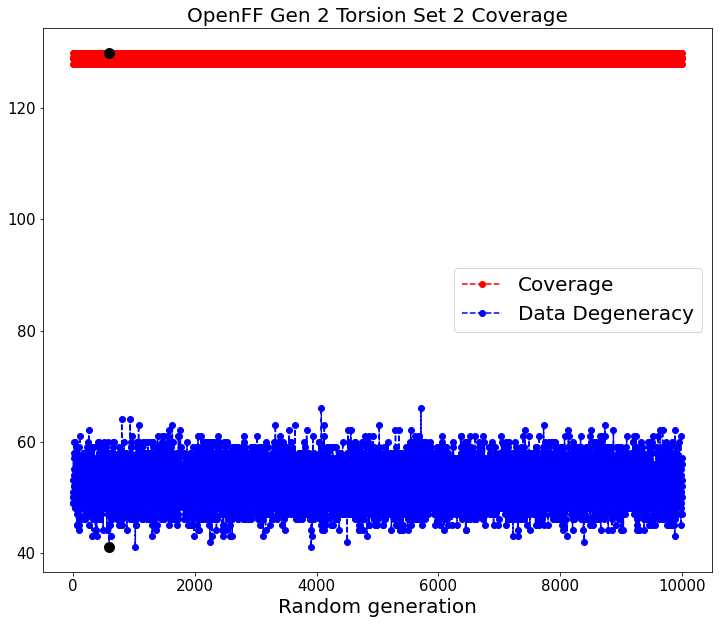

In [5]:

plt.figure(figsize=(12,10))
plt.plot(range(len(coverage_history)), coverage_history,'ro--', label='Coverage')
plt.scatter([overlap_history.index(final_overlap)], [final_coverage],c='k', s=100,zorder=10)
plt.plot(range(len(overlap_history)), overlap_history, 'bo--', label='Data Degeneracy')
plt.scatter([overlap_history.index(final_overlap)], [final_overlap],c='k', s=100,zorder=10)

plt.xlabel('Random generation', fontdict = {'fontsize' : 20})
plt.title('OpenFF Gen 2 Torsion Set 2 Coverage', fontdict = {'fontsize' : 20})
plt.legend(prop={'size': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [6]:
# data= {'tid_calculated_molecules_list': tid_calculated_molecules_list,
#        'tid_molecules_list': tid_molecules_list,
#        'molecule_attributes': molecule_attributes,
#        'molecules_list_dict': molecules_list_dict,
#        'molecules_list_dict_updated': molecules_list_dict_updated,
#        'molecules_list_dict_from_td': molecules_list_dict_from_td,
#        'graph_single_coverage_set': graph_single_coverage_set,
#        'selected': selected,
#        'selected_rotations': selected_rotations}
# with open('coverage_dataset_generated_new.pickle', 'wb') as pfile:
#     pickle.dump(data, pfile)